In [132]:
# First try at auto updating the ECR when notebook is rerun.
files = []

# Imports

In [133]:
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#%autoreload 2

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error
import joblib
#w


In [134]:
files.append(In[-2])

In [135]:
%load_ext autoreload
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Exploration

In [136]:
#

columns_to_absolutely_ignore = ['Street', 'PoolQC', 'FireplaceQu']
columns_to_probably_ignore = ['Fence', 'LotFrontage']
columns_to_ignore = list(dict.fromkeys(columns_to_absolutely_ignore + columns_to_probably_ignore))

original_df = pd.read_csv('data/train (1).csv')
df = pd.read_csv('data/train (1).csv').drop(columns=columns_to_ignore)
df.drop_duplicates(inplace = True)

In [137]:
files.append(In[-2])

In [138]:
df.describe().applymap(lambda x: round(x))

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1379,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
mean,730,57,10517,6,6,1971,1985,104,444,47,567,1057,1163,347,6,1515,0,0,2,0,3,1,7,1,1979,2,473,94,47,22,3,15,3,43,6,2008,180921
std,422,42,9981,1,1,30,21,181,456,161,442,439,387,437,49,525,1,0,1,1,1,0,2,1,25,1,214,125,66,61,29,56,40,496,3,1,79443
min,1,20,1300,1,1,1872,1950,0,0,0,0,0,334,0,0,334,0,0,0,0,0,0,2,0,1900,0,0,0,0,0,0,0,0,0,1,2006,34900
25%,366,20,7554,5,5,1954,1967,0,0,0,223,796,882,0,0,1130,0,0,1,0,2,1,5,0,1961,1,334,0,0,0,0,0,0,0,5,2007,129975
50%,730,50,9478,6,5,1973,1994,0,384,0,478,992,1087,0,0,1464,0,0,2,0,3,1,6,1,1980,2,480,0,25,0,0,0,0,0,6,2008,163000
75%,1095,70,11602,7,6,2000,2004,166,712,0,808,1298,1391,728,0,1777,1,0,2,1,3,1,7,1,2002,2,576,168,68,0,0,0,0,0,8,2009,214000
max,1460,190,215245,10,9,2010,2010,1600,5644,1474,2336,6110,4692,2065,572,5642,3,2,3,2,8,3,14,3,2010,4,1418,857,547,552,508,480,738,15500,12,2010,755000


In [139]:
# round(df.corr(),2).iloc[:,0:75]

In [140]:
# plt.figure(figsize = (50,50))
# sns.heatmap(round(df.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12});

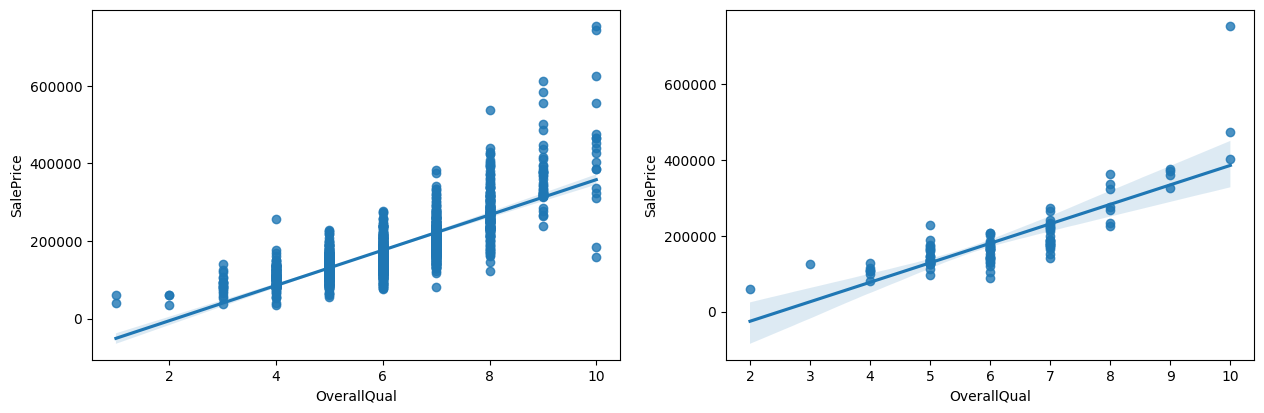

In [141]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.regplot(x='OverallQual', y='SalePrice', data=df, ci=95)
plt.subplot(2,2,2)
sns.regplot(x='OverallQual', y='SalePrice', data=df.sample(100, random_state=9), ci=95);

In [142]:
# Display numerics columns
df.select_dtypes(include=['int64', 'float64'])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [143]:
# Display Objects columns
df.select_dtypes(include=['O'])

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MiscFeature,SaleType,SaleCondition
0,RL,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
1,RL,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
2,RL,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
3,RL,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,NaN,WD,Abnorml
4,RL,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
1456,RL,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,NaN,WD,Normal
1457,RL,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,NaN,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,Shed,WD,Normal
1458,RL,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,NaN,WD,Normal


In [144]:
# df.shape
# df.isna()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False).head(15)

MiscFeature     96.301370
Alley           93.767123
MasVnrType      59.726027
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtQual         2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [145]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [146]:
df[df['SalePrice'] == df['SalePrice'].describe()['max']]

,Id,MSSubClass,MSZoning,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,21535,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,0,1,2007,WD,Normal,755000


In [147]:
df['GarageArea'][df['GarageArea']==0].count()

81

In [148]:
# df.OverallCond.plot.kde()
# df.OverallQual.plot.kde()
# plt.plot()

# Sandbox

In [149]:
# df[['GrLivArea']].boxplot()

# Feature Engineering

In [150]:
# filtering one big time outlier for consistency.
df = df[df['GrLivArea']<5000].reset_index(drop=True)

# w/o o w Shed is the only relevant data to extract from MiscFeature
df['MiscFeature'] = df['MiscFeature'].apply(lambda x: 0 if x != 'Shed' else 1)

# Making date interpretable by the model, making it cyclical.
df['sin_MoSold'] = np.sin(2*np.pi*df.MoSold/12)
df['cos_MoSold'] = np.cos(2*np.pi*df.MoSold/12)
df.drop(columns=['MoSold'], inplace=True)

CentralAir_encoder = OneHotEncoder(sparse=False, drop='if_binary', categories=[['N', 'Y']]) # Instanciate encoder
df['CentralAir'] = CentralAir_encoder.fit_transform(df[['CentralAir']]) # Fit encoder and tranform


/home/julienrm/.pyenv/versions/3.8.12/envs/kaggle_aws_houses_df/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [151]:
files.append(In[-2])

# ML

In [190]:
# %%writefile my_python_file.py
# All Columns to preprocess
to_classify = ['HouseStyle']
to_robust = ['LotArea', 'YearBuilt', 'GrLivArea']
to_min_max = ['OverallQual', 'OverallCond', 'Fireplaces', 'GarageCars',\
    'FullBath']
already_processed = ['sin_MoSold', 'cos_MoSold', 'CentralAir']
# Bench : 'MiscFeature'
select_features = to_classify + to_robust + to_min_max + already_processed


X = df[select_features]
y = df['SalePrice']  # Target

r2list = []
rmse_list = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, \
        random_state=np.random.randint(1, 20001) )


    # Building Pipeline
    preprocessor = ColumnTransformer([
        ('onehot', OneHotEncoder(), to_classify),
        ('std_scaler', RobustScaler(), to_robust), # RobustScaler/StandardScaler
        ('minmax', MinMaxScaler(), to_min_max),
    ], remainder='passthrough')  # passthrough/drop

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())  # Linear Regression model
    ])
    pipeline.fit(X_train, y_train)

    # R^2 Score, not RMSE
    # train_score = pipeline.score(X_train, y_train)
    # test_score = pipeline.score(X_test, y_test)
    r2list.append(pipeline.score(X_test, y_test))
    # print(f"Training_Score: {train_score:.5f}")

    predicted_prices = pipeline.predict(X_test)
    rmse_list.append(np.sqrt(mean_squared_error(y_test, predicted_prices)))

print(f"# Used features count : {len(select_features)}") #/len(df.columns)
print(f"# Mean Test_Score: {np.mean(r2list):.5f}")
# Display RMSE
print(f"# Average prediction error: ~{np.mean(rmse_list):.4f} (RMSE)")


# Used features count : 12
# Mean Test_Score: 0.81080
# Average prediction error: ~33733.0249 (RMSE)


In [153]:
files.append(In[-2])

In [154]:
joblib.dump(pipeline, 'aws_houses_df/model.pkl')
# joblib.dump(pipeline, 'model.pkl')

['aws_houses_df/model.pkl']

In [155]:
# y_test
# print(predicted_prices)

# To Prod

In [156]:
# !ls aws_houses_df
# !cp houses_df.ipynb aws_houses_df/notebook.ipynb

# needs to copy a whole cell to model.py ideally.

In [157]:
### Somewhat fixed pip freeze on VSCode, doing it manually from CLI works just fine. I had to add light useless
### vscode interpreter pip installs on requirements.txt sadly.
# !pip freeze

In [197]:
with open('aws_houses_df/shaky_model.py', 'w') as file:
    for cell_content in files:
        file.write(cell_content)

!pip freeze > aws_houses_df/requirements.txt

# way out to get the most simple requirements FOR FINAL VERSION
# !pip uninstall -y $(pip freeze)
# !pip install numpy pandas matplotlib seaborn scikit-learn joblib


# Dump

In [159]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# model = smf.ols(formula = 'SalePrice ~ OverallQual + GrLivArea', data=df).fit()
# model = sm.OLS(Y, X).fit() # Finds the best beta
# model.predict(X) # The Y_pred (regression-line)
# model.params

# Y = df['SalePrice']
# X = df.drop(columns='SalePrice')
# brute_model = sm.OLS(Y, X).fit() # Finds the best beta
# brute_model.predict(X) # The Y_pred (regression-line)
# # brute_model.summary()
# model.summary()

In [160]:
# if __name__ == "__main__":
#     user_input = [[1, 'NY Street', 4, 'appartement']]
#     prediction =  joblib.load('model.pkl').predict(user_input)
#     print(f"Prediction: {prediction}")

In [161]:
model = joblib.load('aws_houses_df/model.pkl')
r2list = []
rmse_list = []
r2list.append(model.score(X_test, y_test))
predicted_prices = model.predict(X_test)
rmse_list.append(np.sqrt(mean_squared_error(y_test, predicted_prices)))

print(f"# Used features count : {len(select_features)}") #/len(df.columns)
print(f"# Mean Test_Score: {np.mean(r2list):.5f}")
print(f"# Average prediction error: ~{np.mean(rmse_list):.4f} (RMSE)")

# Used features count : 12
# Mean Test_Score: 0.77867
# Average prediction error: ~33008.0882 (RMSE)


In [162]:
# if __name__ == "__main__":
    # model = joblib.load('aws_houses_df/model.pkl')
    # r2list = []
    # rmse_list = []
#     for i in range(5):
#         r2list.append(model.score(X_test, y_test))
#         predicted_prices = model.predict(X_test)
#         rmse_list.append(np.sqrt(mean_squared_error(y_test, predicted_prices)))

# print(f"# Used features count : {len(select_features)}") #/len(df.columns)
# print(f"# Mean Test_Score: {np.mean(r2list):.5f}")
# print(f"# Average prediction error: ~{np.mean(rmse_list):.4f} (RMSE)")